In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemOLLIE = 'ollie0'
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "o" or running_system[0:1] == "b" or running_system == systemHLRN or running_system == systemOLLIE:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom") # add standard 's modules
#########################################

computer =  ollie0
working directory set to /home/ollie/loziel/pyfesom


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
#from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
#import cmocean as cmaps
from matplotlib.colors import ListedColormap
import colormaps as cmaps

no cmocean


In [3]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = ListedColormap(cmaps.viridis.colors)
# choose simulation
runid='Arc12'
# choose depth
get3d = False
# variable ID
var_id= 'tr18'

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/work/ollie/loziel/mesh/meshArc4.5_notrotated/runoff/'
savepath    = '/work/ollie/loziel/figures/runoff/'
meshpath    = '/work/ollie/loziel/mesh/meshArc4.5_notrotated/'


# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /work/ollie/loziel/figures/runoff/ already existing


In [4]:
mesh = pf.load_mesh(meshpath, abg = [0., 0., 0.], usepickle=False,get3d=get3d)

Load 2d part of the grid in 33 second(s)


In [5]:
mesh


FESOM mesh:
path                  = /work/ollie/loziel/mesh/meshArc4.5_notrotated
alpha, beta, gamma    = 0.0, 0.0, 0.0
number of 2d nodes    = 753179
number of 2d elements = 1480268
number of 3d nodes    = 0

        

In [6]:
elem2=mesh.elem[mesh.no_cyclic_elem,:]

/global/AWIsoft/intel/2018/intelpython2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


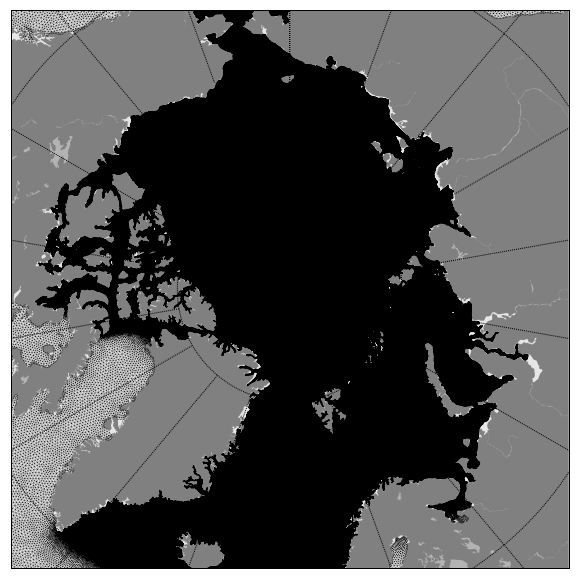

In [7]:
fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.02,hspace=0.02)
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
im=plt.triplot(x, y, mesh.elem, lw=0.2,color='k')
plt.show()  

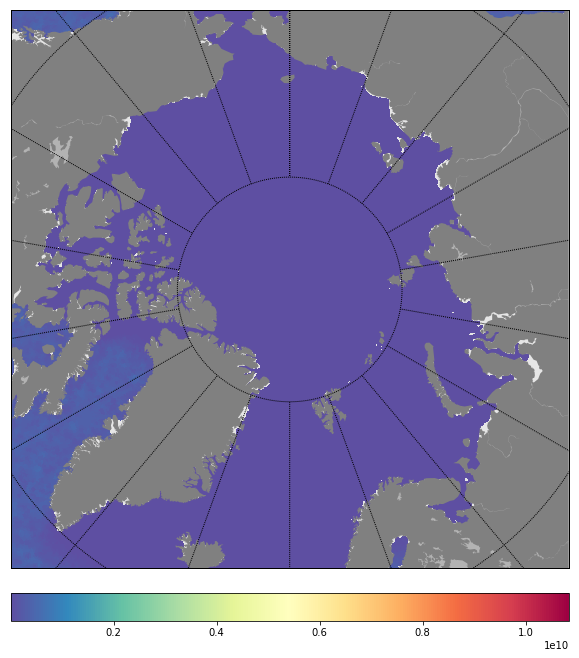

In [8]:
fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.02,hspace=0.02)
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
plt.tripcolor(x, y, elem2, \
              facecolors=mesh.voltri[mesh.no_cyclic_elem], \
              edgecolors='none',\
             cmap=cm.Spectral_r)
plt.colorbar(orientation='horizontal', pad=0.03);
plt.show() 